In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mv_norm

In [171]:
df = pd.read_csv("data.txt", names = ['x_1', 'y'])

In [172]:
df.head()

,x_1,y
0,-2.23,1.01
1,-1.30,0.69
2,-0.42,-0.66
3,0.30,-1.34
4,0.33,-1.75


In [173]:
df.tail()

,x_1,y
5,0.52,-0.98
6,0.87,0.25
7,1.80,1.57
8,2.74,1.65
9,3.62,1.51


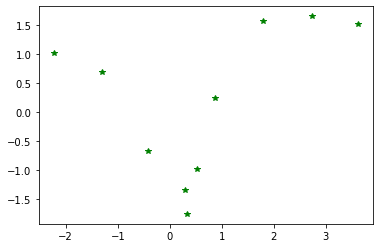

In [174]:
plt.plot(df['x_1'], df['y'], 'g*')

In [175]:
df.isnull().sum()

x_1    0
y      0
dtype: int64

In [176]:
n = df['x_1'].size
ones = np.ones(n)
x_1 = df.values[:, 0]
df.insert(0, 'x_0', ones, True)
df.insert(2, 'x_2', x_1**2, True)
df.insert(3, 'x_3', x_1**3, True)
df.insert(4, 'x_4', x_1**4, True)

In [177]:
df.head()

,x_0,x_1,x_2,x_3,x_4,y
0,1.0,-2.23,4.9729,-11.089567,24.729734,1.01
1,1.0,-1.30,1.6900,-2.197000,2.856100,0.69
2,1.0,-0.42,0.1764,-0.074088,0.031117,-0.66
3,1.0,0.30,0.0900,0.027000,0.008100,-1.34
4,1.0,0.33,0.1089,0.035937,0.011859,-1.75


In [178]:
df.tail()

,x_0,x_1,x_2,x_3,x_4,y
5,1.0,0.52,0.2704,0.140608,0.073116,-0.98
6,1.0,0.87,0.7569,0.658503,0.572898,0.25
7,1.0,1.80,3.2400,5.832000,10.497600,1.57
8,1.0,2.74,7.5076,20.570824,56.364058,1.65
9,1.0,3.62,13.1044,47.437928,171.725299,1.51


In [179]:
# Number of training examples
M = len(df['x_1'])

# Noise precision of likelihood
beta = 4

# Prior precision
lambdaa = 1
y = df.values[:, -1]

In [180]:
# Define the design matrix for x \in [-4, 4]
# This will be useful for plotting random functions inferred from posterior

x_axis = np.linspace(-4, 4, 1000);
design_mat = np.column_stack((np.ones(x_axis.shape[0]), x_axis, x_axis ** 2, x_axis ** 3, x_axis ** 4))
np.shape(design_mat)
# design_mat[0:5, :]

(1000, 5)

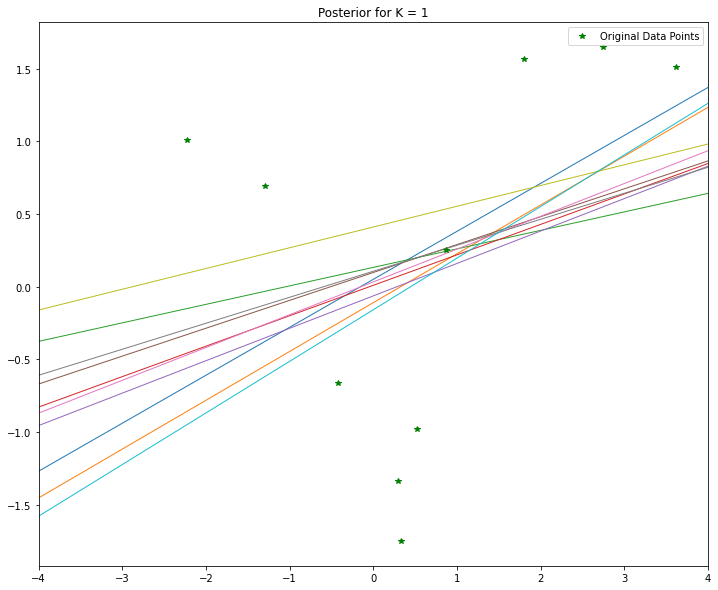

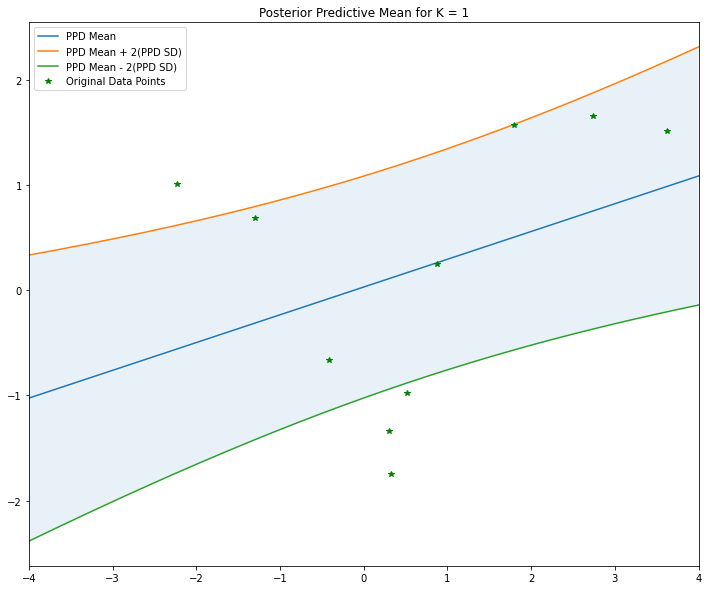

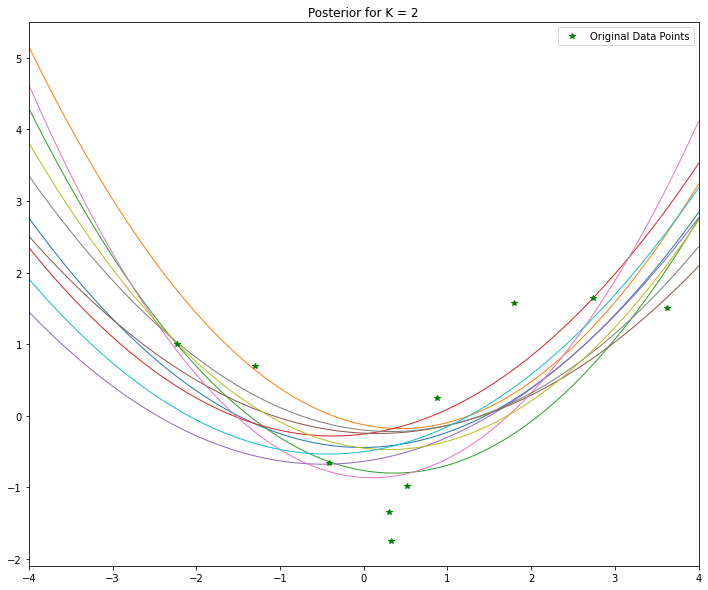

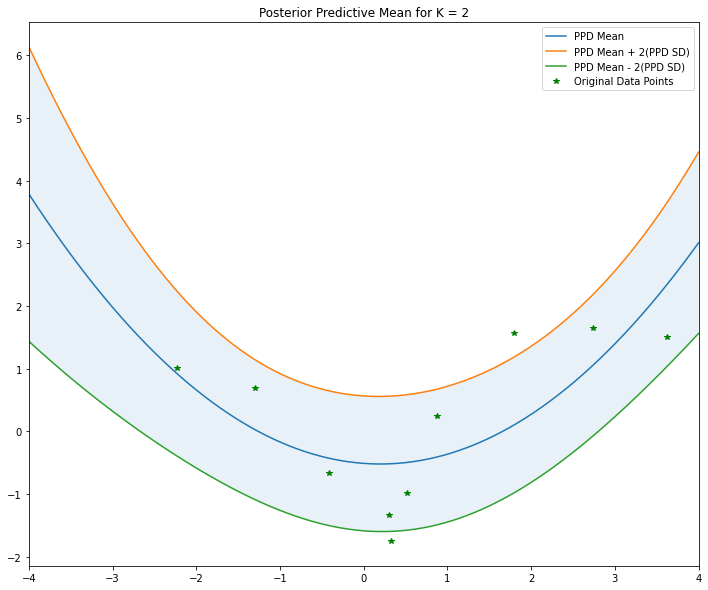

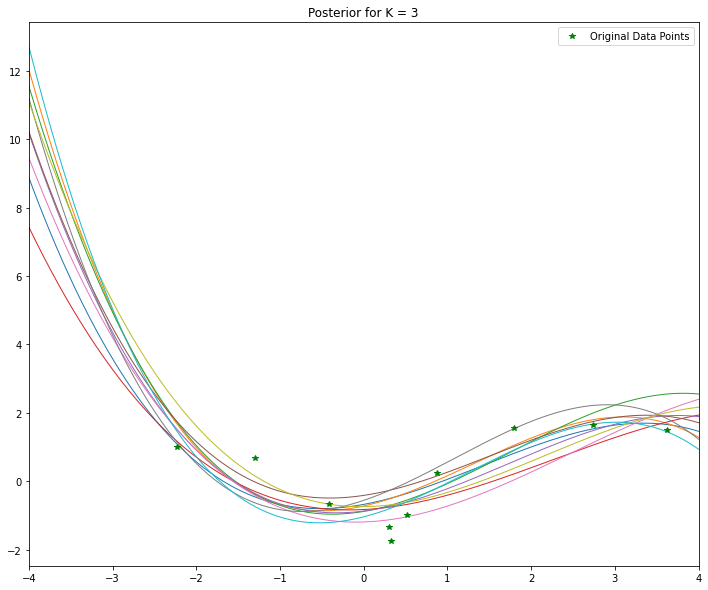

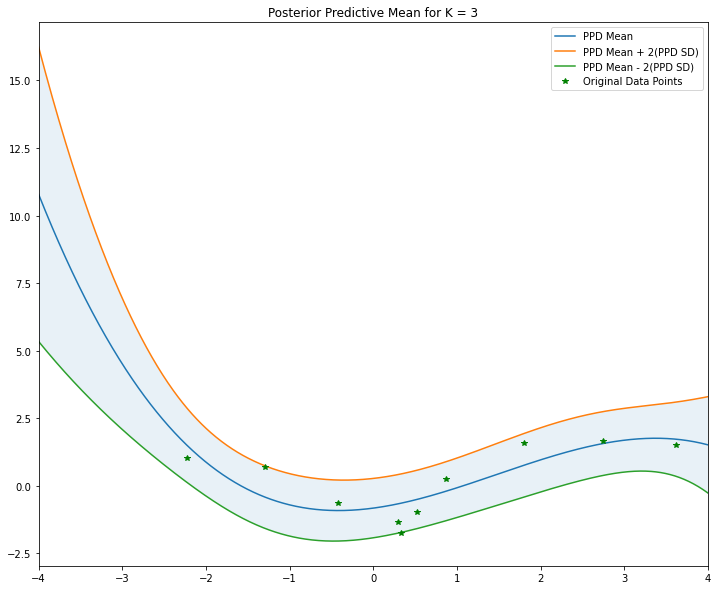

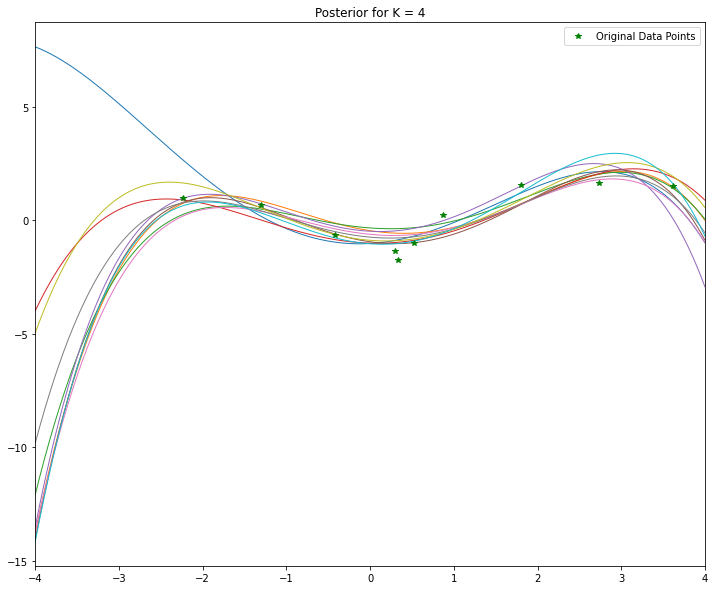

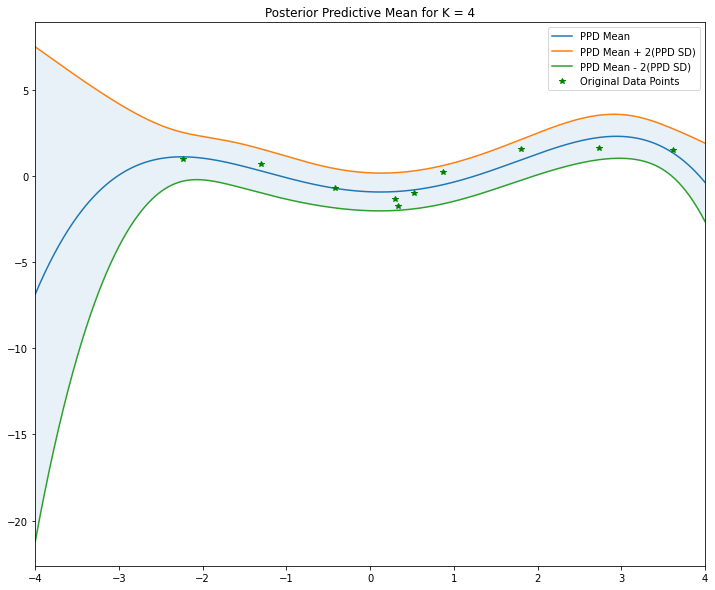

In [181]:
for K in [1, 2, 3, 4]:
    
    # Set the dimension of the design matrix
    D = K + 1
    
    # Assign the design matrix
    X = df.values[:, 0:D]
   
    # Posterior mean 
    mu = np.dot(X.T, X) + (lambdaa/beta) * np.identity(D)
    mu = np.linalg.inv(mu)
    mu = np.dot(mu, X.T)
    mu = np.dot(mu, y)

    # Posterior covariance
    sigma = beta * np.dot(X.T, X) + lambdaa * np.identity(D)
    sigma = np.linalg.inv(sigma)

    # Plot for the random functions inferred from posterior for given K  (equivalently D = K + 1)
    plt.figure(figsize = (12,10))

    # Draw 10 samples for weight vector from posterior
    beta_drawn = np.random.multivariate_normal(mu, sigma, 10)

    for i in range(M):

        # Evaluate the i'th prediction vector (of dimension 1000 \times 1) 
        # using the first 'D' columns of design matrix
        # corresponding to the i'th sample present in beta_drawn which was drawn above
        pred_vec = np.dot(design_mat[:, 0:D], beta_drawn[i, :].T)

        # Plot the i'th random function corresponding 
        # to the i'th prediction vector
        plt.plot(x_axis, pred_vec, linewidth = 1)
        
    # Plot original data points
    plt.plot(X[:, 1], y, '*g', label = 'Original Data Points')   
    
    plt.title('Posterior for K = ' + str(K))
    plt.xlim(-4,4)
    plt.legend()
    plt.savefig('images/Posterior for K = ' + str(K)+'.png')
    plt.show()
        
    # Evaluate the prective posterior mean 
    # using the first 'D' columns of design matrix
    # This will be (1000 \times 1) dimensional
    ppd_mu = np.dot(design_mat[:, 0:D], mu.T)

    # Evaluating ppd mean \pm two times the ppd standard deviation
    # These will be stored in ppd_dev_plus and ppd_dev_minus respectively, and 
    # each of these will be (1000 \times 1) dimensional

    dev_mat = np.ones(x_axis.shape[0])
    for i in range(x_axis.shape[0]): 
        # x_axis.shape[0] basically means number of examples in the design 
        # that we are using for all our plots
        # x_axis.shape[0] = 1000 for all our plots 
        dev = np.dot(design_mat[i, 0:D], sigma)
        dev = np.dot(dev, design_mat[i, 0:D].T)
        dev += 1/beta
        dev = np.sqrt(dev)
        dev_mat[i] = dev

    ppd_dev_plus = ppd_mu + 2 * dev_mat
    ppd_dev_minus = ppd_mu - 2 * dev_mat
    
    # Plot for the predictive posterior mean
    plt.figure(figsize = (12, 10))

    # Plot the predictive posterior mean 
    plt.plot(x_axis, ppd_mu, label = 'PPD Mean')

    # Plot ppd mean \pm two times the ppd standard deviation
    plt.plot(x_axis, ppd_dev_plus, label = 'PPD Mean + 2(PPD SD)')
    plt.plot(x_axis, ppd_dev_minus, label = 'PPD Mean - 2(PPD SD)')
    plt.fill_between(x_axis, ppd_dev_minus, ppd_dev_plus, alpha = 0.1)

    # Plot original data points
    plt.plot(X[:, 1], y, '*g', label = 'Original Data Points')   
    
    plt.title('Posterior Predictive Mean for K = ' + str(K))
    plt.xlim(-4,4)
    plt.legend()
    plt.savefig('images/Posterior Predictive Mean for K = ' + str(K)+'.png')
    plt.show()

In [182]:
for K in [1, 2, 3, 4]:
    # Set the dimension of the design matrix
    D = K + 1
    
    # Assign the design matrix
    X = df.values[:, 0:D]
    
    # log - Marginal likelihood 
    log_marginal_lik = np.log(mv_norm.pdf(y, np.zeros(M), np.dot(X, X.T) + (1/beta) * np.identity(M)))
    print('For K =', K, ', the log marginal likelihood is ', log_marginal_lik)

For K = 1 , the log marginal likelihood is  -32.3520152804452
For K = 2 , the log marginal likelihood is  -22.772153178782283
For K = 3 , the log marginal likelihood is  -22.079070642241916
For K = 4 , the log marginal likelihood is  -22.386776180349212


It is easy to see that the model with **K = 3** has the highest log marginal likelihood and therefore seems to explain the data best.

In [184]:
for K in [1, 2, 3, 4]:
    # Set the dimension of the design matrix
    D = K + 1
    
    # Assign the design matrix
    X = df.values[:, 0:D]
    
    # Mode of the posterior gives the MAP estimate for weight vector 'w'
    # As this posterior follows Normal distribution, it has mode equal to its mean
    
    # Posterior mean 
    mu = np.dot(X.T, X) + (lambdaa/beta) * np.identity(D)
    mu = np.linalg.inv(mu)
    mu = np.dot(mu, X.T)
    mu = np.dot(mu, y)
    
    # Set the MAP estimate for 'w' equal to posterior mean
    w_map = mu
    
    # Use the MAP estimate to calculate log likelihood
    log_lik = np.log(mv_norm.pdf(y, np.dot(X, w_map), (1/beta) * np.identity(M)))
    print('For K =', K, ', the log likelihood is ', log_lik)
    

For K = 1 , the log likelihood is  -28.094004379075553
For K = 2 , the log likelihood is  -15.360663659052214
For K = 3 , the log likelihood is  -10.935846883615742
For K = 4 , the log likelihood is  -7.225291259028564


Using the **MAP** estimate, we see that the log likelihood of model with **K = 4** is the highest. This result doesn't agree with what we obtained above using the log marginal likelihood.

In my opinion, using log marginal likelihood in order to select the best model is a better criteria as compared to only using the log likelihood since the former doesn't rely on point based estimate (MAP estimate for weight vector 'w' in this case) and instead does prior averaging for 'w'.

It can be observed from the graph 'Posterior Predictive Mean for K = 3', the $2\sigma$ uncertainity gap seems to be the widest for $x\in [-4, -3]$ which makes sense as it lacks training examples in this region. Hence, I would prefer $x'\in [-4, -3]$ in order to improve the model by reducing the uncertainity gap in this region.